## In this Project I will be using Linear Regression and a Random Forest Regressor to plot data to represent the dependant and independant variables in the insurance.csv Datasaet

In [2]:
!head insurance.csv

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



#Loading in the dataset using Pandas

data = pd.read_csv('insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


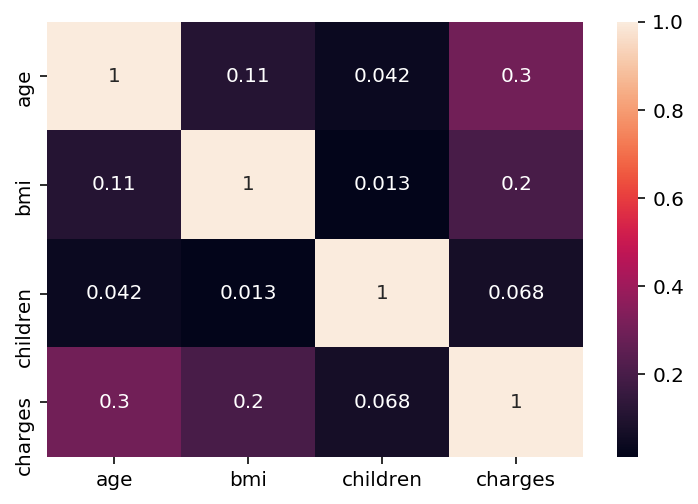

In [4]:
#Trying to see the correlation between the columns
corr1 = data.corr()
sns.heatmap(corr1, annot = True)

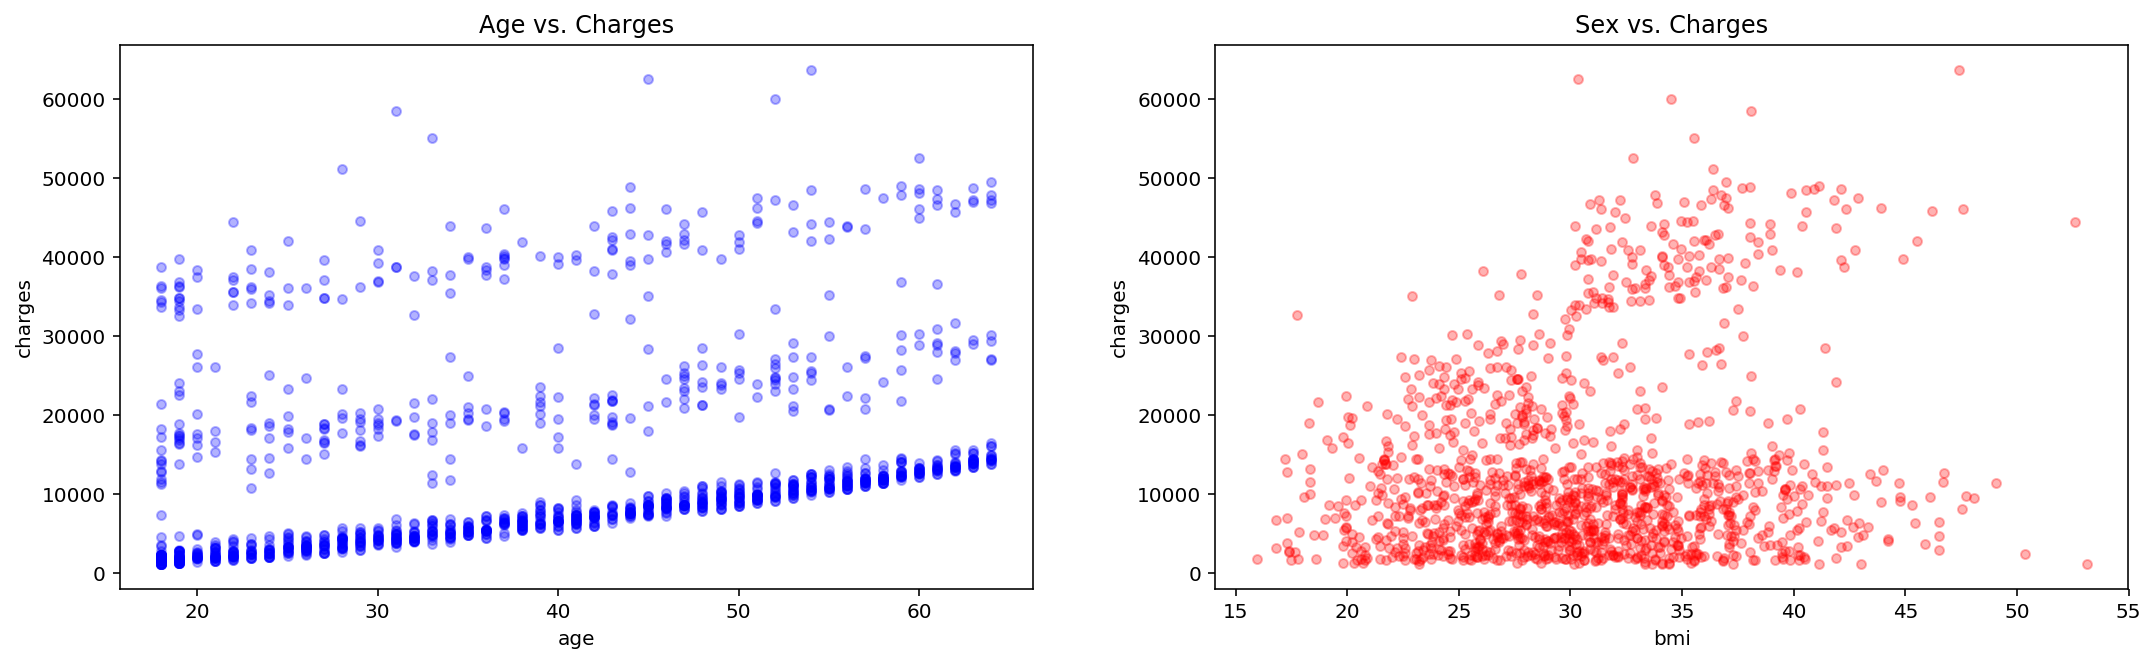

In [5]:
figures, axis = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

data.plot(kind='scatter', x='age', y='charges', alpha=0.3, color='blue', ax=axis[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.3, color='red', ax=axis[1], title="Sex vs. Charges")
plt.show()

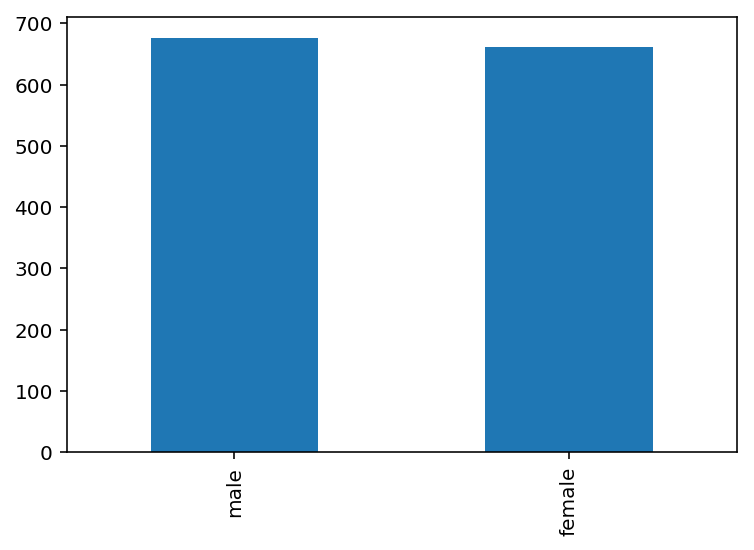

In [6]:
#Checking to see if the sex column is skewed or not.
#In this case it's not.

data['sex'].value_counts()
data['sex'].value_counts().plot(kind='bar')

In [7]:
obj_data = data.select_dtypes(include = ['object']).copy()
obj_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [8]:
obj_data = pd.get_dummies(obj_data)
obj_data.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [9]:
data = pd.concat([data,obj_data], axis =1)
data = data.drop('sex', axis =1)
data = data.drop('region', axis =1)
data = data.drop('smoker', axis =1)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
data.describe(include = 'all')

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [12]:
data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


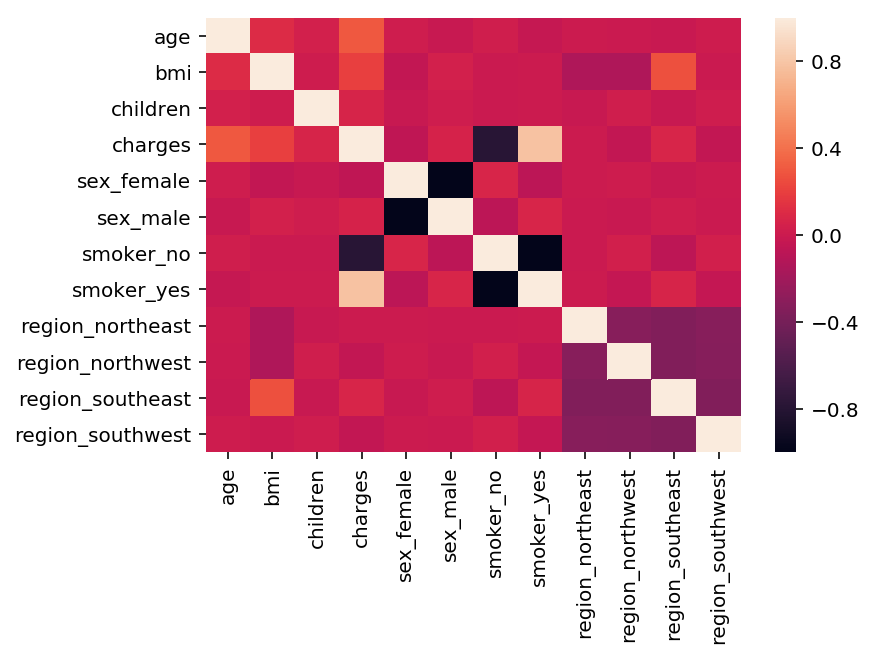

In [13]:
#The correlation of the columns
#Looks like a Minecraft Sword
corr = data.corr()
sns.heatmap(corr)

In [14]:
X = data.drop('charges', axis =1).values
Y = data[['charges']].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)
reg = LinearRegression()
reg.fit(x_train,y_train)
R2 = reg.score(x_test,y_test)
g = reg.predict(x_test)
MSE = mean_squared_error(g, y_test)

print('The Mean Square Error(MSE) is: ', MSE)
print('R2 score is %', R2)


The Mean Square Error(MSE) is:  35585029.808486596
R2 score is % 0.7394054641456173


In [15]:
print(f'Shape: {X.shape}, {Y.shape}, {x_train.shape}, {y_train.size},{x_test.shape}, {y_test.shape}, {g.shape}')

Shape: (1338, 11), (1338, 1), (896, 11), 896,(442, 11), (442, 1), (442, 1)


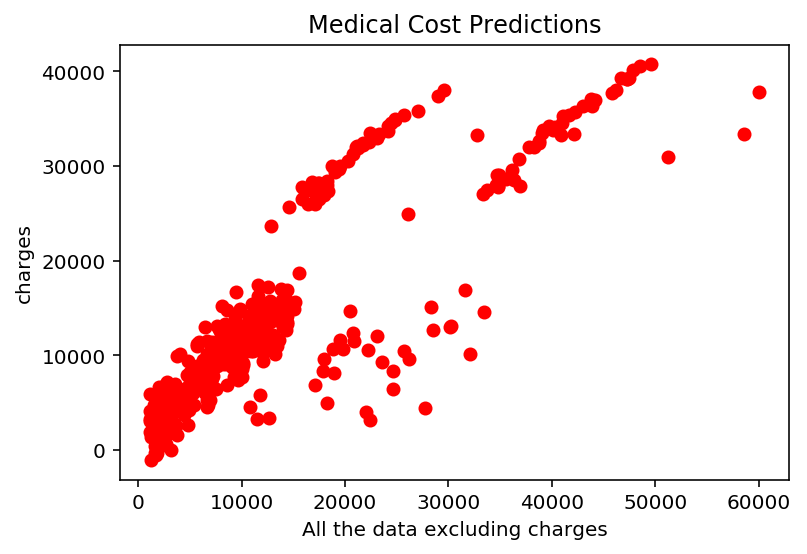

In [21]:
#Prediction graph
plt.scatter(y_test, g, color = 'red')
plt.title('Medical Cost Predictions')
plt.xlabel('All the data excluding charges')
plt.ylabel('charges')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


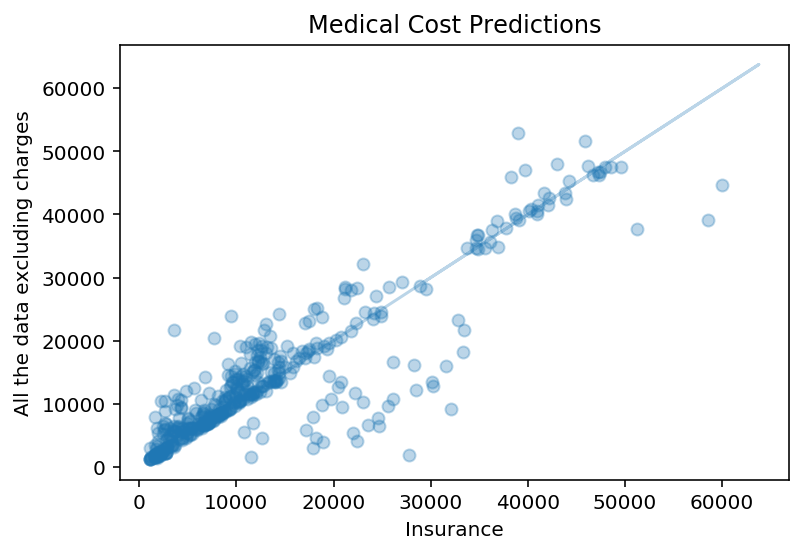

In [22]:
randomTree = RandomForestRegressor()
randomTree.fit(x_train, y_train.ravel())
g1 = randomTree.predict(x_test)
plt.scatter(y_test,g1,alpha=0.3)
plt.plot(Y,Y,alpha=0.3)
plt.title('Medical Cost Predictions')
plt.xlabel('Insurance')
plt.ylabel('All the data excluding charges')
plt.show()
